<font color='red'><b> TF-IDFW2V</b></font>

<b>Tfidf w2v (w1,w2..) = (tfidf(w1) * w2v(w1) + tfidf(w2) * w2v(w2) + …)  /    (tfidf(w1) + tfidf(w2) + …)</b>

<font color='blue'><b>Glove vectors </b></font>

Glove vectors: [link ](https://drive.google.com/file/d/1lDca_ge-GYO0iQ6_XDLWePQFMdAA2b8f/view?usp=sharing)

In [7]:
import pickle

In [8]:
#please use below code to load glove vectors 
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

or else , you can use below code

In [9]:

# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
'''Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!'''

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)




Loading Glove Model


FileNotFoundError: [Errno 2] No such file or directory: 'glove.42B.300d.txt'

# <font color='red'> <b>Task - 1</b></font>

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features +  preprocessed_essay (TFIDF) + Sentiment scores(preprocessed_essay)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features +  preprocessed_essay (TFIDF W2V) + Sentiment scores(preprocessed_essay)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (best `depth` in range [1, 5, 10, 50], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use gridsearch cv or randomsearch cv)/simple cross validation data(you can write your own for loops refer sample solution)</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>min_sample_split</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>min_sample_split</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud(https://www.geeksforgeeks.org/generating-word-cloud-python/) with the words of essay text of these `false positive data points`</li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
   

# <font color='red'><b> Task - 2 </b></font>

For this task consider **set-1** features.

*  Select all the features which are having non-zero feature importance.You can get the feature importance using  'feature_importances_` 
   (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), discard the all other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM).
*  You need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3<br>
  **Note**: when you want to find the feature importance make sure you don't use max_depth parameter keep it None.
  </li>
    <br>
You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<h1>1. Decision Tree </h1>

## 1.1 Loading Data

In [14]:
import pandas
data = pandas.read_csv('preprocessed_data.csv')


In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from tqdm import tqdm
import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from scipy.sparse import hstack

from sklearn.tree import DecisionTreeClassifier

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\NHegde163036\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [18]:
X_train, X_test, y_train, y_test = train_test_split(data, data["project_is_approved"], test_size = 0.2, stratify = data["project_is_approved"])

#creating cross validation datasets
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size = 0.2, stratify = y_train)

#dropping "project_is_approved" since it is our y value
X_train.drop(["project_is_approved"], axis = 1, inplace = True)
X_test.drop(["project_is_approved"], axis = 1, inplace = True)
X_cv.drop(["project_is_approved"], axis = 1, inplace = True)

C:\Users\NHegde163036\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Vectorizing categorical data using One hot encoding technique


In [29]:
data.head(1)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05


In [69]:
#One hot encoding of clean categories
count_vectorizer_oh_cat = CountVectorizer(binary = True)
count_vectorizer_oh_cat.fit(X_train["clean_categories"].values)
print(count_vectorizer_oh_cat.get_feature_names())

categories_oh_train = count_vectorizer_oh_cat.transform(X_train["clean_categories"].values)
categories_oh_test = count_vectorizer_oh_cat.transform(X_test["clean_categories"].values)
categories_oh_cv = count_vectorizer_oh_cat.transform(X_cv["clean_categories"].values)

['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


In [70]:
#One hot encoding of clean_subcategories
count_vectorizer_oh_subcat = CountVectorizer(binary = True)
count_vectorizer_oh_subcat.fit(X_train["clean_subcategories"].values)
print(count_vectorizer_oh_subcat.get_feature_names())

subcategories_oh_train = count_vectorizer_oh_subcat.transform(X_train["clean_subcategories"].values)
subcategories_oh_test = count_vectorizer_oh_subcat.transform(X_test["clean_subcategories"].values)
subcategories_oh_cv = count_vectorizer_oh_subcat.transform(X_cv["clean_subcategories"].values)

['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


In [71]:
#One hot encoding of project_grade_category
count_vectorizer_oh_project_grade = CountVectorizer(binary = True)
count_vectorizer_oh_project_grade.fit(X_train["project_grade_category"].values)
print(count_vectorizer_oh_project_grade.get_feature_names())

project_grade_category_oh_train = count_vectorizer_oh_project_grade.transform(X_train["project_grade_category"].values)
project_grade_category_oh_test = count_vectorizer_oh_project_grade.transform(X_test["project_grade_category"].values)
project_grade_category_oh_cv = count_vectorizer_oh_project_grade.transform(X_cv["project_grade_category"].values)

['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


In [72]:
#One hot encoding of teacher_prefix
count_vectorizer_oh_teacher_prefix = CountVectorizer(binary = True)
count_vectorizer_oh_teacher_prefix.fit(X_train["teacher_prefix"].values)
print(count_vectorizer_oh_teacher_prefix.get_feature_names())

teacher_prefix_oh_train = count_vectorizer_oh_teacher_prefix.transform(X_train["teacher_prefix"].values)
teacher_prefix_oh_test = count_vectorizer_oh_teacher_prefix.transform(X_test["teacher_prefix"].values)
teacher_prefix_oh_cv = count_vectorizer_oh_teacher_prefix.transform(X_cv["teacher_prefix"].values)

['dr', 'mr', 'mrs', 'ms', 'teacher']


In [73]:
#One hot encoding of school_state
count_vectorizer_oh_school_state = CountVectorizer(binary = True)
count_vectorizer_oh_school_state.fit(X_train["school_state"].values)
print(count_vectorizer_oh_school_state.get_feature_names())

school_state_oh_train = count_vectorizer_oh_school_state.transform(X_train["school_state"].values)
school_state_oh_test = count_vectorizer_oh_school_state.transform(X_test["school_state"].values)
school_state_oh_cv = count_vectorizer_oh_school_state.transform(X_cv["school_state"].values)

['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


# Text data Vectorization technique 1 using Tfidf

In [74]:
#Tfidf Vectorization of column "essay"
tfidf_vectorizer_essay = TfidfVectorizer(max_features = 5000, ngram_range = (1,2), min_df = 10)
tfidf_vectorizer_essay.fit(X_train["essay"].values)

essay_tfidf_train = tfidf_vectorizer_essay.transform(X_train["essay"].values)
essay_tfidf_test = tfidf_vectorizer_essay.transform(X_test["essay"].values)
essay_tfidf_cv = tfidf_vectorizer_essay.transform(X_cv["essay"].values)

# Text data Vectorization technique 2 using Tfidf weighted word2vec

In [75]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model_w2v = TfidfVectorizer()
tfidf_model_w2v.fit(X_train["essay"].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model_w2v.get_feature_names(), list(tfidf_model_w2v.idf_)))
tfidf_words = set(tfidf_model_w2v.get_feature_names())

In [40]:
#Tfidf W2V vectorization of column "essay" in train data
essay_tfidf_words_vectors_train = []
for i in tqdm(X_train["essay"].values):
    vector = np.zeros(300)
    weight = 0
    for word in i.split():
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word]
            tf_idf = dictionary[word]*(i.count(word)/len(i.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            weight += tf_idf
    if weight != 0:
        vector /= weight
    essay_tfidf_words_vectors_train.append(vector)

100%|███████████████████████████████████████████████████████████████████████████| 69918/69918 [05:43<00:00, 203.48it/s]


In [41]:
#Tfidf W2V vectorization of column "essay" in test data
essay_tfidf_words_vectors_test = []
for i in tqdm(X_test["essay"].values):
    vector = np.zeros(300)
    weight = 0
    for word in i.split():
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word]
            tf_idf = dictionary[word]*(i.count(word)/len(i.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            weight += tf_idf
    if weight != 0:
        vector /= weight
    essay_tfidf_words_vectors_test.append(vector)

100%|███████████████████████████████████████████████████████████████████████████| 21850/21850 [01:53<00:00, 192.35it/s]


In [42]:
#Tfidf W2V vectorization of column "essay" in cross validation data
essay_tfidf_words_vectors_cv = []
for i in tqdm(X_cv["essay"].values):
    vector = np.zeros(300)
    weight = 0
    for word in i.split():
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word]
            tf_idf = dictionary[word]*(i.count(word)/len(i.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            weight += tf_idf
    if weight != 0:
        vector /= weight
    essay_tfidf_words_vectors_cv.append(vector)

100%|███████████████████████████████████████████████████████████████████████████| 17480/17480 [01:36<00:00, 181.42it/s]


# Normalization of Numerical Data

In [76]:
#Normalization of column "teacher_number_of_previously_posted_projects"
normalizer_previous_projects = Normalizer()
normalizer_previous_projects.fit(X_train["teacher_number_of_previously_posted_projects"].values.reshape(-1,1))

previous_projects_normalized_train = normalizer_previous_projects.transform(X_train["teacher_number_of_previously_posted_projects"].values.reshape(-1,1))
previous_projects_normalized_test = normalizer_previous_projects.transform(X_test["teacher_number_of_previously_posted_projects"].values.reshape(-1,1))
previous_projects_normalized_cv = normalizer_previous_projects.transform(X_cv["teacher_number_of_previously_posted_projects"].values.reshape(-1,1))

In [77]:
scaler_previous_projects = StandardScaler()
scaler_previous_projects.fit(X_train["teacher_number_of_previously_posted_projects"].values.reshape(-1,1))

previous_projects_scaled_train = scaler_previous_projects.transform(X_train["teacher_number_of_previously_posted_projects"].values.reshape(-1,1))
previous_projects_scaled_test = scaler_previous_projects.transform(X_test["teacher_number_of_previously_posted_projects"].values.reshape(-1,1))
previous_projects_scaled_cv = scaler_previous_projects.transform(X_cv["teacher_number_of_previously_posted_projects"].values.reshape(-1,1))

In [78]:
#Normalization of column "price"
normalizer_price = Normalizer()
normalizer_price.fit(X_train["price"].values.reshape(-1,1))

price_normalized_train = normalizer_price.transform(X_train["price"].values.reshape(-1,1))
price_normalized_test = normalizer_price.transform(X_test["price"].values.reshape(-1,1))
price_normalized_cv = normalizer_price.transform(X_cv["price"].values.reshape(-1,1))

In [79]:
scaler_price = StandardScaler()
scaler_price.fit(X_train["price"].values.reshape(-1,1))

price_scaled_train = scaler_price.transform(X_train["price"].values.reshape(-1,1))
price_scaled_test = scaler_price.transform(X_test["price"].values.reshape(-1,1))
price_scaled_cv = scaler_price.transform(X_cv["price"].values.reshape(-1,1))

# Sentimental Analysis of Text data

In [52]:
#Sentimental Analysis of "essay" in train data
sid_essay_train = SentimentIntensityAnalyzer()

In [53]:
essay_positive_train = []
essay_negative_train = []
essay_neutral_train = []
essay_compound_train = []

for i in tqdm(X_train["essay"].values):
    essay_positive_train.append(sid_essay_train.polarity_scores(i)["pos"])
    essay_negative_train.append(sid_essay_train.polarity_scores(i)["neg"])
    essay_neutral_train.append(sid_essay_train.polarity_scores(i)["neu"])
    essay_compound_train.append(sid_essay_train.polarity_scores(i)["compound"])

100%|████████████████████████████████████████████████████████████████████████████| 69918/69918 [23:42<00:00, 49.17it/s]


In [54]:
#Sentimental Analysis of "essay" in test data
sid_essay_test = SentimentIntensityAnalyzer()

essay_positive_test = []
essay_negative_test = []
essay_neutral_test = []
essay_compound_test = []

for i in tqdm(X_test["essay"].values):
    essay_positive_test.append(sid_essay_test.polarity_scores(i)["pos"])
    essay_negative_test.append(sid_essay_test.polarity_scores(i)["neg"])
    essay_neutral_test.append(sid_essay_test.polarity_scores(i)["neu"])
    essay_compound_test.append(sid_essay_test.polarity_scores(i)["compound"])

100%|████████████████████████████████████████████████████████████████████████████| 21850/21850 [07:24<00:00, 49.12it/s]


In [55]:
#Sentimental Analysis of "essay" in cross validation data
sid_essay_cv= SentimentIntensityAnalyzer()

essay_positive_cv = []
essay_negative_cv = []
essay_neutral_cv = []
essay_compound_cv = []

for i in tqdm(X_cv["essay"].values):
    essay_positive_cv.append(sid_essay_cv.polarity_scores(i)["pos"])
    essay_negative_cv.append(sid_essay_cv.polarity_scores(i)["neg"])
    essay_neutral_cv.append(sid_essay_cv.polarity_scores(i)["neu"])
    essay_compound_cv.append(sid_essay_cv.polarity_scores(i)["compound"])

100%|████████████████████████████████████████████████████████████████████████████| 17480/17480 [03:57<00:00, 73.54it/s]


In [56]:
essay_positive_train = np.asarray(essay_positive_train).reshape(len(X_train),1)
essay_negative_train = np.asarray(essay_negative_train).reshape(len(X_train),1)
essay_neutral_train = np.asarray(essay_neutral_train).reshape(len(X_train),1)
essay_compound_train = np.asarray(essay_compound_train).reshape(len(X_train),1)

essay_positive_test = np.asarray(essay_positive_test).reshape(len(X_test),1)
essay_negative_test = np.asarray(essay_negative_test).reshape(len(X_test),1)
essay_neutral_test = np.asarray(essay_neutral_test).reshape(len(X_test),1)
essay_compound_test = np.asarray(essay_compound_test).reshape(len(X_test),1)

essay_positive_cv = np.asarray(essay_positive_cv).reshape(len(X_cv),1)
essay_negative_cv = np.asarray(essay_negative_cv).reshape(len(X_cv),1)
essay_neutral_cv = np.asarray(essay_neutral_cv).reshape(len(X_cv),1)
essay_compound_cv = np.asarray(essay_compound_cv).reshape(len(X_cv),1)

# Applying Decision Tree

## Set 1: categorical, numerical features + preprocessed_essay (TFIDF) + Sentiment scores(preprocessed_essay)

In [63]:
X_train_merge_1 = hstack((categories_oh_train, subcategories_oh_train, project_grade_category_oh_train, teacher_prefix_oh_train, school_state_oh_train, essay_tfidf_train, price_scaled_train, previous_projects_scaled_train, essay_positive_train, essay_negative_train, essay_neutral_train, essay_compound_train)).tocsr()

In [65]:
X_test_merge_1 = hstack((categories_oh_test, subcategories_oh_test, project_grade_category_oh_test, teacher_prefix_oh_test, school_state_oh_test, essay_tfidf_test, price_scaled_test, previous_projects_scaled_test, essay_positive_test, essay_negative_test, essay_neutral_test, essay_compound_test)).tocsr()

In [66]:
X_cv_merge_1 = hstack((categories_oh_cv, subcategories_oh_cv, project_grade_category_oh_cv, teacher_prefix_oh_cv, school_state_oh_cv, essay_tfidf_cv, price_scaled_cv, previous_projects_scaled_cv, essay_positive_cv, essay_negative_cv, essay_neutral_cv, essay_compound_cv)).tocsr()

In [215]:
#Training Decision Tree Model
decision_tree = DecisionTreeClassifier(max_depth = 3) #setting an arbitrary depth value
classifier = decision_tree.fit(X_train_merge_1, y_train)

In [90]:
set_1_feature_names = []

for i in count_vectorizer_oh_cat.get_feature_names():
    set_1_feature_names.append(i)
    
for i in count_vectorizer_oh_subcat.get_feature_names():
    set_1_feature_names.append(i)
    
for i in count_vectorizer_oh_project_grade.get_feature_names():
    set_1_feature_names.append(i)
    
for i in count_vectorizer_oh_teacher_prefix.get_feature_names():
    set_1_feature_names.append(i)
    
for i in count_vectorizer_oh_school_state.get_feature_names():
    set_1_feature_names.append(i)

for i in tfidf_vectorizer_essay.get_feature_names():
    set_1_feature_names.append(i)

set_1_feature_names.append("positive")
set_1_feature_names.append("negative")
set_1_feature_names.append("neutral")
set_1_feature_names.append("compound")
set_1_feature_names.append("price")
set_1_feature_names.append("teacher_number_of_previously_posted_projects")

In [94]:
#checking the shapes to ensure all feature names have been added 
print(len(set_1_feature_names))
print(X_train_merge_1.shape, y_train.shape)
print(X_test_merge_1.shape, y_test.shape)
print(X_cv_merge_1.shape, y_cv.shape)

5105
(69918, 5105) (69918,)
(21850, 5105) (21850,)
(17480, 5105) (17480,)


# Hyperparameter Tuning using GridSearchCV for Best Accuracy

In [105]:
from sklearn.model_selection import GridSearchCV, learning_curve

In [126]:
decision_tree = DecisionTreeClassifier()
parameter_range = {"max_depth" : [1,5,10,100,500], "min_samples_split" : [5,10,50,100,500]}

In [127]:
#ref:https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
classifier = GridSearchCV(decision_tree, parameter_range, cv=10, scoring = "roc_auc", n_jobs = 1, verbose = 10, return_train_score = True)

classifier.fit(X_train_merge_1, y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
[CV 1/10; 1/25] START max_depth=1, min_samples_split=5..........................
[CV 1/10; 1/25] END max_depth=1, min_samples_split=5;, score=(train=0.555, test=0.555) total time=   2.9s
[CV 2/10; 1/25] START max_depth=1, min_samples_split=5..........................
[CV 2/10; 1/25] END max_depth=1, min_samples_split=5;, score=(train=0.555, test=0.551) total time=   2.3s
[CV 3/10; 1/25] START max_depth=1, min_samples_split=5..........................
[CV 3/10; 1/25] END max_depth=1, min_samples_split=5;, score=(train=0.554, test=0.563) total time=   3.0s
[CV 4/10; 1/25] START max_depth=1, min_samples_split=5..........................
[CV 4/10; 1/25] END max_depth=1, min_samples_split=5;, score=(train=0.554, test=0.560) total time=   2.3s
[CV 5/10; 1/25] START max_depth=1, min_samples_split=5..........................
[CV 5/10; 1/25] END max_depth=1, min_samples_split=5;, score=(train=0.556, test=0.550) total time=   2.3s
[C

[CV 4/10; 5/25] END max_depth=1, min_samples_split=500;, score=(train=0.554, test=0.560) total time=   2.1s
[CV 5/10; 5/25] START max_depth=1, min_samples_split=500........................
[CV 5/10; 5/25] END max_depth=1, min_samples_split=500;, score=(train=0.556, test=0.550) total time=   2.2s
[CV 6/10; 5/25] START max_depth=1, min_samples_split=500........................
[CV 6/10; 5/25] END max_depth=1, min_samples_split=500;, score=(train=0.555, test=0.553) total time=   2.2s
[CV 7/10; 5/25] START max_depth=1, min_samples_split=500........................
[CV 7/10; 5/25] END max_depth=1, min_samples_split=500;, score=(train=0.554, test=0.559) total time=   2.1s
[CV 8/10; 5/25] START max_depth=1, min_samples_split=500........................
[CV 8/10; 5/25] END max_depth=1, min_samples_split=500;, score=(train=0.555, test=0.555) total time=   2.2s
[CV 9/10; 5/25] START max_depth=1, min_samples_split=500........................
[CV 9/10; 5/25] END max_depth=1, min_samples_split=500;

[CV 8/10; 9/25] END max_depth=5, min_samples_split=100;, score=(train=0.642, test=0.624) total time=  10.8s
[CV 9/10; 9/25] START max_depth=5, min_samples_split=100........................
[CV 9/10; 9/25] END max_depth=5, min_samples_split=100;, score=(train=0.641, test=0.628) total time=  11.6s
[CV 10/10; 9/25] START max_depth=5, min_samples_split=100.......................
[CV 10/10; 9/25] END max_depth=5, min_samples_split=100;, score=(train=0.645, test=0.632) total time=   9.4s
[CV 1/10; 10/25] START max_depth=5, min_samples_split=500.......................
[CV 1/10; 10/25] END max_depth=5, min_samples_split=500;, score=(train=0.645, test=0.637) total time=   9.6s
[CV 2/10; 10/25] START max_depth=5, min_samples_split=500.......................
[CV 2/10; 10/25] END max_depth=5, min_samples_split=500;, score=(train=0.649, test=0.627) total time=   9.4s
[CV 3/10; 10/25] START max_depth=5, min_samples_split=500.......................
[CV 3/10; 10/25] END max_depth=5, min_samples_split=

[CV 2/10; 14/25] END max_depth=10, min_samples_split=100;, score=(train=0.699, test=0.645) total time=  29.2s
[CV 3/10; 14/25] START max_depth=10, min_samples_split=100......................
[CV 3/10; 14/25] END max_depth=10, min_samples_split=100;, score=(train=0.696, test=0.672) total time=  26.4s
[CV 4/10; 14/25] START max_depth=10, min_samples_split=100......................
[CV 4/10; 14/25] END max_depth=10, min_samples_split=100;, score=(train=0.696, test=0.630) total time=  30.0s
[CV 5/10; 14/25] START max_depth=10, min_samples_split=100......................
[CV 5/10; 14/25] END max_depth=10, min_samples_split=100;, score=(train=0.694, test=0.649) total time=  28.6s
[CV 6/10; 14/25] START max_depth=10, min_samples_split=100......................
[CV 6/10; 14/25] END max_depth=10, min_samples_split=100;, score=(train=0.697, test=0.650) total time=  27.1s
[CV 7/10; 14/25] START max_depth=10, min_samples_split=100......................
[CV 7/10; 14/25] END max_depth=10, min_sample

[CV 5/10; 18/25] END max_depth=100, min_samples_split=50;, score=(train=0.941, test=0.542) total time= 4.6min
[CV 6/10; 18/25] START max_depth=100, min_samples_split=50......................
[CV 6/10; 18/25] END max_depth=100, min_samples_split=50;, score=(train=0.951, test=0.565) total time= 4.7min
[CV 7/10; 18/25] START max_depth=100, min_samples_split=50......................
[CV 7/10; 18/25] END max_depth=100, min_samples_split=50;, score=(train=0.954, test=0.557) total time= 4.6min
[CV 8/10; 18/25] START max_depth=100, min_samples_split=50......................
[CV 8/10; 18/25] END max_depth=100, min_samples_split=50;, score=(train=0.958, test=0.565) total time= 4.7min
[CV 9/10; 18/25] START max_depth=100, min_samples_split=50......................
[CV 9/10; 18/25] END max_depth=100, min_samples_split=50;, score=(train=0.960, test=0.561) total time= 4.8min
[CV 10/10; 18/25] START max_depth=100, min_samples_split=50.....................
[CV 10/10; 18/25] END max_depth=100, min_samp

[CV 8/10; 22/25] END max_depth=500, min_samples_split=10;, score=(train=0.995, test=0.547) total time= 4.5min
[CV 9/10; 22/25] START max_depth=500, min_samples_split=10......................
[CV 9/10; 22/25] END max_depth=500, min_samples_split=10;, score=(train=0.996, test=0.537) total time= 4.6min
[CV 10/10; 22/25] START max_depth=500, min_samples_split=10.....................
[CV 10/10; 22/25] END max_depth=500, min_samples_split=10;, score=(train=0.996, test=0.554) total time= 4.6min
[CV 1/10; 23/25] START max_depth=500, min_samples_split=50......................
[CV 1/10; 23/25] END max_depth=500, min_samples_split=50;, score=(train=0.981, test=0.568) total time= 4.7min
[CV 2/10; 23/25] START max_depth=500, min_samples_split=50......................
[CV 2/10; 23/25] END max_depth=500, min_samples_split=50;, score=(train=0.981, test=0.560) total time= 4.6min
[CV 3/10; 23/25] START max_depth=500, min_samples_split=50......................
[CV 3/10; 23/25] END max_depth=500, min_samp

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'max_depth': [1, 5, 10, 100, 500],
                         'min_samples_split': [5, 10, 50, 100, 500]},
             return_train_score=True, scoring='roc_auc', verbose=10)

In [128]:
auc_train = classifier.cv_results_["mean_train_score"]
auc_cv = classifier.cv_results_["mean_test_score"]


In [153]:
#comparing with max_depth and  min_sample_split with auc_train_score and auc_cv_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


In [135]:
max_depth = [1,1,1,1,1,5,5,5,5,5,10,10,10,10,10,100,100,100,100,100,500,500,500,500,500]
min_samples_split = [5,10,50,100,500,5,10,50,100,500,5,10,50,100,500,5,10,50,100,500,5,10,50,100,500]

In [136]:
auc_train_df = pandas.DataFrame(data = {"Max Depth":max_depth, "Min Sample Split":min_samples_split, "Train AUC Score":auc_train})

In [137]:
auc_train_df = auc_train_df.pivot(index = "Max Depth", columns = "Min Sample Split", values = "Train AUC Score")


Text(0.5, 1.0, 'AUC Heatmap for Training Dataset')

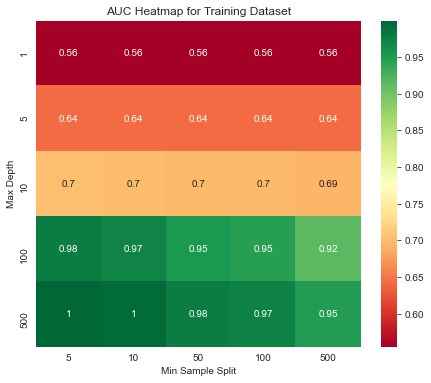

In [138]:
sns.set_style("whitegrid")
plt.figure(figsize = (16,6))
plt.subplot(1,2,1)
sns.heatmap(auc_train_df, annot = True, cmap = "RdYlGn").set_title("AUC Heatmap for Training Dataset")

In [139]:
auc_cv_df = pandas.DataFrame(data = {"Max Depth":max_depth, "Min Sample Split":min_samples_split, "CV AUC Score":auc_cv})

In [140]:
auc_cv_df = auc_cv_df.pivot(index = "Max Depth", columns = "Min Sample Split", values = "CV AUC Score")


Text(0.5, 1.0, 'AUC Heatmap for CV Dataset')

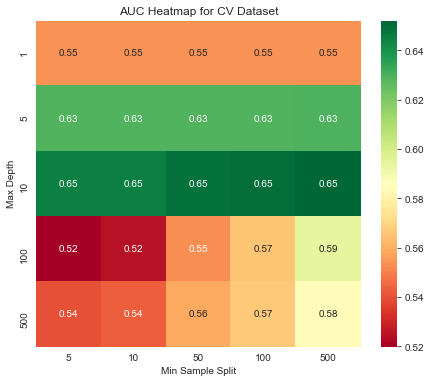

In [141]:
sns.set_style("whitegrid")
plt.figure(figsize = (16,6))
plt.subplot(1,2,1)
sns.heatmap(auc_cv_df, annot = True, cmap = "RdYlGn").set_title("AUC Heatmap for CV Dataset")

#  From the graphs we can see that the best value of max_depth is and min_samples_split is 

In [143]:
#Training final model based on best value of parameters
final_decision_tree_1 = DecisionTreeClassifier(max_depth = 10 , min_samples_split = 100)
final_decision_tree_1.fit(X_train_merge_1, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=100)

In [144]:
y_train_pred_1 = final_decision_tree_1.predict_proba(X_train_merge_1)[:,1]
y_test_pred_1 = final_decision_tree_1.predict_proba(X_test_merge_1)[:,1]

In [150]:
train_fpr_1, train_tpr_1, train_thresholds_1 = roc_curve(y_train, y_train_pred_1)
test_fpr_1, test_tpr_1, test_thresholds_1 = roc_curve(y_test, y_test_pred_1)

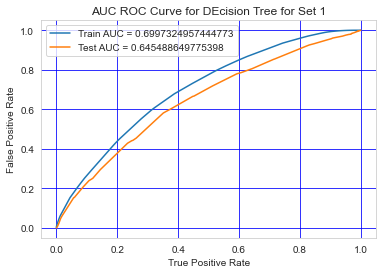

In [154]:
plt.plot(train_fpr_1, train_tpr_1, label = "Train AUC = " + str(auc(train_fpr_1, train_tpr_1)))
plt.plot(test_fpr_1, test_tpr_1, label = "Test AUC = " + str(auc(test_fpr_1, test_tpr_1)))
plt.legend()
plt.grid(b = True, which = "major", color = "b", linestyle ="-")
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC ROC Curve for DEcision Tree for Set 1")
plt.show()

# Plotting Confusion Matrix

In [155]:
from sklearn.metrics import confusion_matrix

In [165]:
def predict(proba, threshold, fpr, tpr):
    t = threshold[np.argmax(tpr*(1-fpr))]
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    print("Max value of tpr*(1-fpr) is ", max(tpr*(1-fpr)), "for threshold ", np.round(t, 3))
    return predictions

Test Confusion Matrix
Max value of tpr*(1-fpr) is  0.37716067199704917 for threshold  0.881
[[ 2146  1162]
 [ 7762 10780]]
Max value of tpr*(1-fpr) is  0.37716067199704917 for threshold  0.881


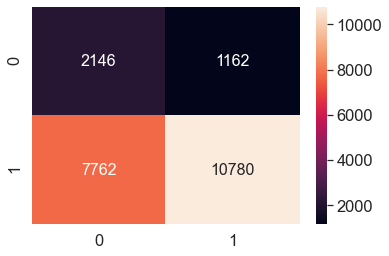

In [166]:
print("Test Confusion Matrix")
print(confusion_matrix(y_test, predict(y_test_pred_1, test_thresholds_1, test_fpr_1, test_tpr_1 )))
cm_df_1 = pandas.DataFrame(confusion_matrix(y_test, predict(y_test_pred_1, test_thresholds_1, test_fpr_1, test_tpr_1 )),range(2), range(2))
sns.set(font_scale = 1.5)
sns.heatmap(cm_df_1, annot = True, annot_kws = {"size":16}, fmt = "g")


# False Positive Datapoints in our Dataset

In [162]:
essay_tfidf_test.shape

(21850, 5000)

In [205]:
tfidf_vectorized_words = tfidf_vectorizer_essay.get_feature_names()
threshold_value_test = 0.881
fp_index = []
y_test_list = list(y_test)
for i in tqdm(range(len(y_test_list))):
    if y_test_list[i] == 0 and y_test_pred_1[i] >= threshold_value_test:
        fp_index.append(i)

100%|████████████████████████████████████████████████████████████████████████| 21850/21850 [00:00<00:00, 428398.34it/s]


In [206]:
#Extracting false positive values at the indexes in fp_index
fp_word_list = []
for i in tqdm(range(len(fp_index))):
    fp_word_list.append(str(tfidf_vectorized_words[i]))

100%|██████████████████████████████████████████████████████████████████████████| 1074/1074 [00:00<00:00, 268968.38it/s]


# Creating wordcloud of false positive data points 

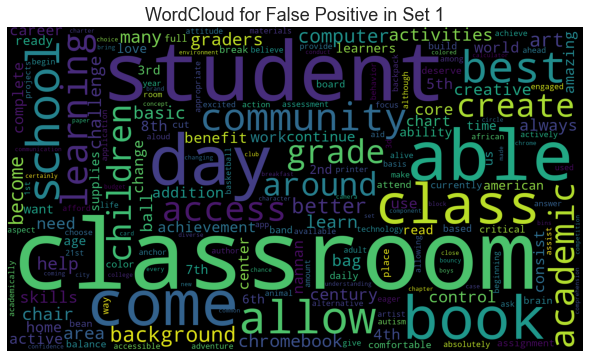

In [174]:
separator = " "
word_string = separator.join(fp_word_list)

wordcloud = WordCloud(width = 1600, height = 900, background_color = "black", stopwords = stopwords, min_font_size = 8).generate(word_string)

plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("WordCloud for False Positive in Set 1")
plt.show()

# Boxplot of False Positive Datapoints

In [175]:
box_plot_price_df_1 = pandas.DataFrame(X_test["price"])
box_plot_price_df_1 = box_plot_price_df_1.iloc[fp_index, :]


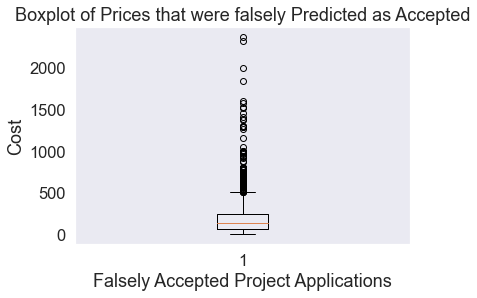

In [176]:
plt.boxplot(box_plot_price_df_1.values)
plt.title("Boxplot of Prices that were falsely Predicted as Accepted")
plt.xlabel("Falsely Accepted Project Applications")
plt.ylabel("Cost")
plt.grid()
plt.show()


# PDF with teacher_number_of_previously_posted_projects of false positive data points

In [177]:
pdf_teacher_number_of_previously_posted_projects_df_1 = pandas.DataFrame(X_test["teacher_number_of_previously_posted_projects"])
pdf_teacher_number_of_previously_posted_projects_df_1 = pdf_teacher_number_of_previously_posted_projects_df_1.iloc[fp_index, :]


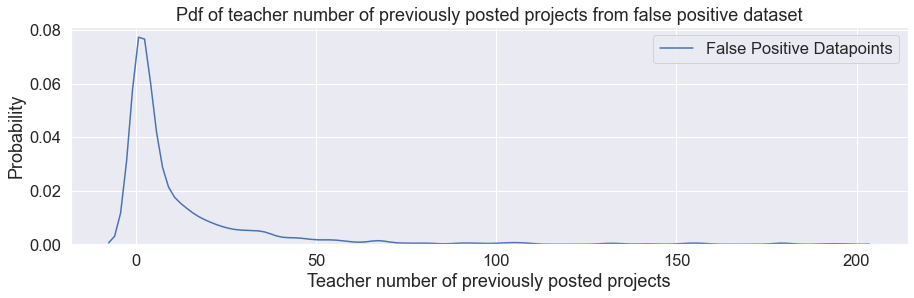

In [178]:
plt.figure(figsize = (15,4))
sns.distplot(pdf_teacher_number_of_previously_posted_projects_df_1.values, hist = False, label = "False Positive Datapoints")
plt.title("Pdf of teacher number of previously posted projects from false positive dataset")
plt.xlabel("Teacher number of previously posted projects")
plt.ylabel("Probability")
plt.legend()
plt.show()



## Set 2: categorical, numerical features + preprocessed_essay (TFIDF W2V) + Sentiment scores(preprocessed_essay)

In [179]:
X_train_merge_2 = hstack((categories_oh_train, subcategories_oh_train, project_grade_category_oh_train, teacher_prefix_oh_train, school_state_oh_train, essay_tfidf_words_vectors_train, price_scaled_train, previous_projects_scaled_train, essay_positive_train, essay_negative_train, essay_neutral_train, essay_compound_train)).tocsr()

In [180]:
X_test_merge_2 = hstack((categories_oh_test, subcategories_oh_test, project_grade_category_oh_test, teacher_prefix_oh_test, school_state_oh_test, essay_tfidf_words_vectors_test, price_scaled_test, previous_projects_scaled_test, essay_positive_test, essay_negative_test, essay_neutral_test, essay_compound_test)).tocsr()

In [181]:
X_cv_merge_2 = hstack((categories_oh_cv, subcategories_oh_cv, project_grade_category_oh_cv, teacher_prefix_oh_cv, school_state_oh_cv, essay_tfidf_words_vectors_cv, price_scaled_cv, previous_projects_scaled_cv, essay_positive_cv, essay_negative_cv, essay_neutral_cv, essay_compound_cv)).tocsr()

In [182]:
#Training Decision Tree Model
decision_tree = DecisionTreeClassifier(max_depth = 3) #setting an arbitrary depth value
classifier = decision_tree.fit(X_train_merge_2, y_train)

In [183]:
set_2_feature_names = []

for i in count_vectorizer_oh_cat.get_feature_names():
    set_2_feature_names.append(i)
    
for i in count_vectorizer_oh_subcat.get_feature_names():
    set_2_feature_names.append(i)
    
for i in count_vectorizer_oh_project_grade.get_feature_names():
    set_2_feature_names.append(i)
    
for i in count_vectorizer_oh_teacher_prefix.get_feature_names():
    set_2_feature_names.append(i)
    
for i in count_vectorizer_oh_school_state.get_feature_names():
    set_2_feature_names.append(i)

for i in tfidf_model_w2v.get_feature_names():
    set_2_feature_names.append(i)

set_2_feature_names.append("positive")
set_2_feature_names.append("negative")
set_2_feature_names.append("neutral")
set_2_feature_names.append("compound")
set_2_feature_names.append("price")
set_2_feature_names.append("teacher_number_of_previously_posted_projects")

In [184]:
#checking the shapes to ensure all feature names have been added 
print(len(set_2_feature_names))
print(X_train_merge_2.shape, y_train.shape)
print(X_test_merge_2.shape, y_test.shape)
print(X_cv_merge_2.shape, y_cv.shape)

47442
(69918, 405) (69918,)
(21850, 405) (21850,)
(17480, 405) (17480,)


# Hyperparameter Tuning using GridSearchCV for Best Accuracy

In [185]:
decision_tree = DecisionTreeClassifier()
parameter_range = {"max_depth" : [1,5,10,100,500], "min_samples_split" : [5,10,50,100,500]}

In [186]:
#ref:https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
classifier = GridSearchCV(decision_tree, parameter_range, cv=10, scoring = "roc_auc", n_jobs = 1, verbose = 10, return_train_score = True)

classifier.fit(X_train_merge_2, y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
[CV 1/10; 1/25] START max_depth=1, min_samples_split=5..........................
[CV 1/10; 1/25] END max_depth=1, min_samples_split=5;, score=(train=0.564, test=0.566) total time=   8.3s
[CV 2/10; 1/25] START max_depth=1, min_samples_split=5..........................
[CV 2/10; 1/25] END max_depth=1, min_samples_split=5;, score=(train=0.564, test=0.563) total time=   6.4s
[CV 3/10; 1/25] START max_depth=1, min_samples_split=5..........................
[CV 3/10; 1/25] END max_depth=1, min_samples_split=5;, score=(train=0.563, test=0.565) total time=   5.8s
[CV 4/10; 1/25] START max_depth=1, min_samples_split=5..........................
[CV 4/10; 1/25] END max_depth=1, min_samples_split=5;, score=(train=0.565, test=0.552) total time=   5.4s
[CV 5/10; 1/25] START max_depth=1, min_samples_split=5..........................
[CV 5/10; 1/25] END max_depth=1, min_samples_split=5;, score=(train=0.564, test=0.563) total time=   5.2s
[C

[CV 4/10; 5/25] END max_depth=1, min_samples_split=500;, score=(train=0.565, test=0.552) total time=   6.5s
[CV 5/10; 5/25] START max_depth=1, min_samples_split=500........................
[CV 5/10; 5/25] END max_depth=1, min_samples_split=500;, score=(train=0.564, test=0.563) total time=   6.3s
[CV 6/10; 5/25] START max_depth=1, min_samples_split=500........................
[CV 6/10; 5/25] END max_depth=1, min_samples_split=500;, score=(train=0.564, test=0.566) total time=   6.3s
[CV 7/10; 5/25] START max_depth=1, min_samples_split=500........................
[CV 7/10; 5/25] END max_depth=1, min_samples_split=500;, score=(train=0.563, test=0.567) total time=   6.5s
[CV 8/10; 5/25] START max_depth=1, min_samples_split=500........................
[CV 8/10; 5/25] END max_depth=1, min_samples_split=500;, score=(train=0.564, test=0.558) total time=   6.5s
[CV 9/10; 5/25] START max_depth=1, min_samples_split=500........................
[CV 9/10; 5/25] END max_depth=1, min_samples_split=500;

[CV 8/10; 9/25] END max_depth=5, min_samples_split=100;, score=(train=0.662, test=0.616) total time=  19.7s
[CV 9/10; 9/25] START max_depth=5, min_samples_split=100........................
[CV 9/10; 9/25] END max_depth=5, min_samples_split=100;, score=(train=0.658, test=0.630) total time=  19.6s
[CV 10/10; 9/25] START max_depth=5, min_samples_split=100.......................
[CV 10/10; 9/25] END max_depth=5, min_samples_split=100;, score=(train=0.660, test=0.636) total time=  20.3s
[CV 1/10; 10/25] START max_depth=5, min_samples_split=500.......................
[CV 1/10; 10/25] END max_depth=5, min_samples_split=500;, score=(train=0.660, test=0.632) total time=  19.6s
[CV 2/10; 10/25] START max_depth=5, min_samples_split=500.......................
[CV 2/10; 10/25] END max_depth=5, min_samples_split=500;, score=(train=0.661, test=0.625) total time=  19.9s
[CV 3/10; 10/25] START max_depth=5, min_samples_split=500.......................
[CV 3/10; 10/25] END max_depth=5, min_samples_split=

[CV 2/10; 14/25] END max_depth=10, min_samples_split=100;, score=(train=0.755, test=0.614) total time=  55.0s
[CV 3/10; 14/25] START max_depth=10, min_samples_split=100......................
[CV 3/10; 14/25] END max_depth=10, min_samples_split=100;, score=(train=0.742, test=0.625) total time=  54.4s
[CV 4/10; 14/25] START max_depth=10, min_samples_split=100......................
[CV 4/10; 14/25] END max_depth=10, min_samples_split=100;, score=(train=0.744, test=0.600) total time=  53.7s
[CV 5/10; 14/25] START max_depth=10, min_samples_split=100......................
[CV 5/10; 14/25] END max_depth=10, min_samples_split=100;, score=(train=0.740, test=0.633) total time=  52.8s
[CV 6/10; 14/25] START max_depth=10, min_samples_split=100......................
[CV 6/10; 14/25] END max_depth=10, min_samples_split=100;, score=(train=0.745, test=0.644) total time=  55.5s
[CV 7/10; 14/25] START max_depth=10, min_samples_split=100......................
[CV 7/10; 14/25] END max_depth=10, min_sample

[CV 5/10; 18/25] END max_depth=100, min_samples_split=50;, score=(train=0.958, test=0.566) total time= 3.8min
[CV 6/10; 18/25] START max_depth=100, min_samples_split=50......................
[CV 6/10; 18/25] END max_depth=100, min_samples_split=50;, score=(train=0.958, test=0.575) total time= 3.7min
[CV 7/10; 18/25] START max_depth=100, min_samples_split=50......................
[CV 7/10; 18/25] END max_depth=100, min_samples_split=50;, score=(train=0.957, test=0.570) total time= 3.8min
[CV 8/10; 18/25] START max_depth=100, min_samples_split=50......................
[CV 8/10; 18/25] END max_depth=100, min_samples_split=50;, score=(train=0.958, test=0.568) total time= 3.7min
[CV 9/10; 18/25] START max_depth=100, min_samples_split=50......................
[CV 9/10; 18/25] END max_depth=100, min_samples_split=50;, score=(train=0.959, test=0.561) total time= 3.7min
[CV 10/10; 18/25] START max_depth=100, min_samples_split=50.....................
[CV 10/10; 18/25] END max_depth=100, min_samp

[CV 8/10; 22/25] END max_depth=500, min_samples_split=10;, score=(train=0.996, test=0.541) total time= 3.9min
[CV 9/10; 22/25] START max_depth=500, min_samples_split=10......................
[CV 9/10; 22/25] END max_depth=500, min_samples_split=10;, score=(train=0.996, test=0.534) total time= 3.8min
[CV 10/10; 22/25] START max_depth=500, min_samples_split=10.....................
[CV 10/10; 22/25] END max_depth=500, min_samples_split=10;, score=(train=0.996, test=0.543) total time= 4.0min
[CV 1/10; 23/25] START max_depth=500, min_samples_split=50......................
[CV 1/10; 23/25] END max_depth=500, min_samples_split=50;, score=(train=0.957, test=0.568) total time= 3.9min
[CV 2/10; 23/25] START max_depth=500, min_samples_split=50......................
[CV 2/10; 23/25] END max_depth=500, min_samples_split=50;, score=(train=0.959, test=0.556) total time= 3.6min
[CV 3/10; 23/25] START max_depth=500, min_samples_split=50......................
[CV 3/10; 23/25] END max_depth=500, min_samp

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'max_depth': [1, 5, 10, 100, 500],
                         'min_samples_split': [5, 10, 50, 100, 500]},
             return_train_score=True, scoring='roc_auc', verbose=10)

In [188]:
auc_train = classifier.cv_results_["mean_train_score"]
auc_cv = classifier.cv_results_["mean_test_score"]


In [189]:
max_depth = [1,1,1,1,1,5,5,5,5,5,10,10,10,10,10,100,100,100,100,100,500,500,500,500,500]
min_samples_split = [5,10,50,100,500,5,10,50,100,500,5,10,50,100,500,5,10,50,100,500,5,10,50,100,500]

In [190]:
auc_train_df = pandas.DataFrame(data = {"Max Depth":max_depth, "Min Sample Split":min_samples_split, "Train AUC Score":auc_train})

In [191]:
auc_train_df = auc_train_df.pivot(index = "Max Depth", columns = "Min Sample Split", values = "Train AUC Score")


Text(0.5, 1.0, 'AUC Heatmap for Training Dataset')

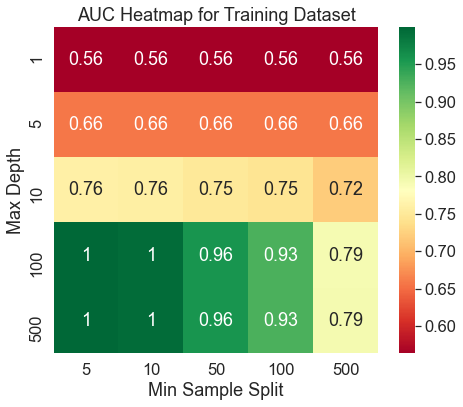

In [192]:
sns.set_style("whitegrid")
plt.figure(figsize = (16,6))
plt.subplot(1,2,1)
sns.heatmap(auc_train_df, annot = True, cmap = "RdYlGn").set_title("AUC Heatmap for Training Dataset")

In [193]:
auc_cv_df = pandas.DataFrame(data = {"Max Depth":max_depth, "Min Sample Split":min_samples_split, "CV AUC Score":auc_cv})

In [194]:
auc_cv_df = auc_cv_df.pivot(index = "Max Depth", columns = "Min Sample Split", values = "CV AUC Score")


Text(0.5, 1.0, 'AUC Heatmap for CV Dataset')

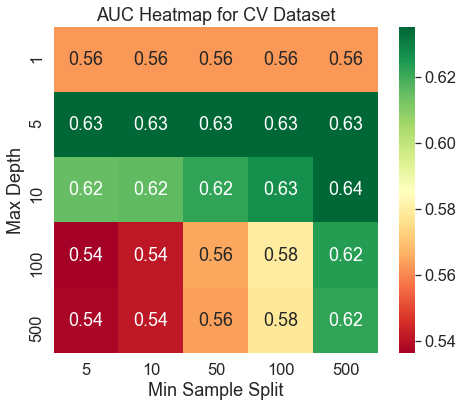

In [195]:
sns.set_style("whitegrid")
plt.figure(figsize = (16,6))
plt.subplot(1,2,1)
sns.heatmap(auc_cv_df, annot = True, cmap = "RdYlGn").set_title("AUC Heatmap for CV Dataset")

#  From the graphs we can see that the best value of max_depth is 10 and min_samples_split is 500

In [196]:
#Training final model based on best value of parameters
final_decision_tree_2 = DecisionTreeClassifier(max_depth = 10, min_samples_split = 500)
final_decision_tree_2.fit(X_train_merge_2, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=500)

In [197]:
y_train_pred_2 = final_decision_tree_2.predict_proba(X_train_merge_2)[:,1]
y_test_pred_2 = final_decision_tree_2.predict_proba(X_test_merge_2)[:,1]

In [198]:
train_fpr_2, train_tpr_2, train_thresholds_2 = roc_curve(y_train, y_train_pred_2)
test_fpr_2, test_tpr_2, test_thresholds_2 = roc_curve(y_test, y_test_pred_2)

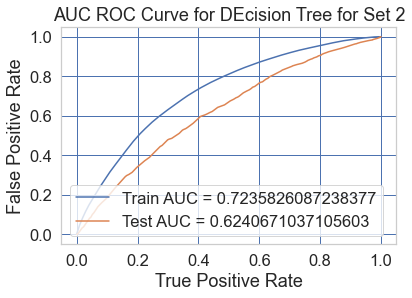

In [199]:
plt.plot(train_fpr_2, train_tpr_2, label = "Train AUC = " + str(auc(train_fpr_2, train_tpr_2)))
plt.plot(test_fpr_2, test_tpr_2, label = "Test AUC = " + str(auc(test_fpr_2, test_tpr_2)))
plt.legend()
plt.grid(b = True, which = "major", color = "b", linestyle ="-")
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC ROC Curve for DEcision Tree for Set 2")
plt.show()

# Plotting Confusion Matrix

In [200]:
from sklearn.metrics import confusion_matrix

Test Confusion Matrix
Max value of tpr*(1-fpr) is  0.35401430876821105 for threshold  0.868
[[ 1961  1347]
 [ 7469 11073]]
Max value of tpr*(1-fpr) is  0.35401430876821105 for threshold  0.868


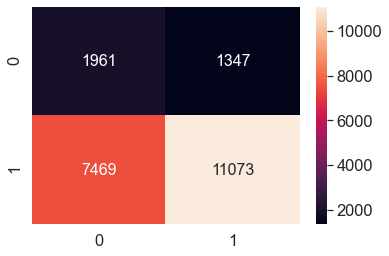

In [201]:
print("Test Confusion Matrix")
print(confusion_matrix(y_test, predict(y_test_pred_2, test_thresholds_2, test_fpr_2, test_tpr_2 )))
cm_df_2 = pandas.DataFrame(confusion_matrix(y_test, predict(y_test_pred_2, test_thresholds_2, test_fpr_2, test_tpr_2 )),range(2), range(2))
sns.set(font_scale = 1.5)
sns.heatmap(cm_df_2, annot = True, annot_kws = {"size":16}, fmt = "g")


# False Positive Datapoints in our Dataset

In [207]:
tfidf_w2v_vectorized_words = tfidf_model_w2v.get_feature_names()
threshold_value_test = 0.868
fp_index = []
y_test_list = list(y_test)
for i in tqdm(range(len(y_test_list))):
    if y_test_list[i] == 0 and y_test_pred_2[i] >= threshold_value_test:
        fp_index.append(i)

100%|████████████████████████████████████████████████████████████████████████| 21850/21850 [00:00<00:00, 475017.19it/s]


In [208]:
#Extracting false positive values at the indexes in fp_index
fp_word_list = []
for i in fp_index:
    fp_word_list.append(str(tfidf_w2v_vectorized_words[i]))

# Creating wordcloud of false positive data points 

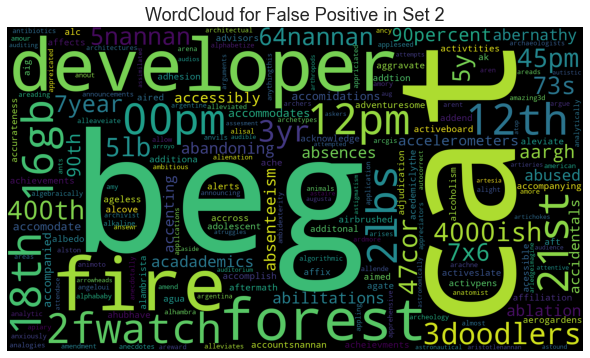

In [209]:
stopwords = set(STOPWORDS)

separator = " "
word_string = separator.join(fp_word_list)

wordcloud = WordCloud(width = 1600, height = 900, background_color = "black", stopwords = stopwords, min_font_size = 8).generate(word_string)

plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("WordCloud for False Positive in Set 2")
plt.show()

# Boxplot of False Positive Datapoints

In [210]:
box_plot_price_df_2 = pandas.DataFrame(X_test["price"])
box_plot_price_df_2 = box_plot_price_df_2.iloc[fp_index, :]


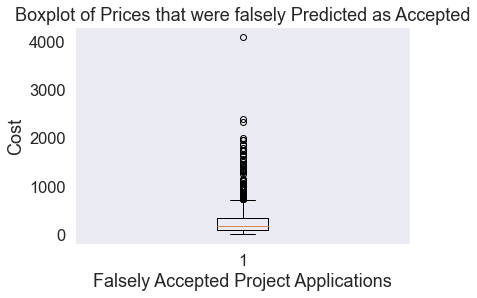

In [211]:
plt.boxplot(box_plot_price_df_2.values)
plt.title("Boxplot of Prices that were falsely Predicted as Accepted")
plt.xlabel("Falsely Accepted Project Applications")
plt.ylabel("Cost")
plt.grid()
plt.show()


# PDF with teacher_number_of_previously_posted_projects of false positive data points

In [212]:
pdf_teacher_number_of_previously_posted_projects_df_2 = pandas.DataFrame(X_test["teacher_number_of_previously_posted_projects"])
pdf_teacher_number_of_previously_posted_projects_df_2 = pdf_teacher_number_of_previously_posted_projects_df_2.iloc[fp_index, :]


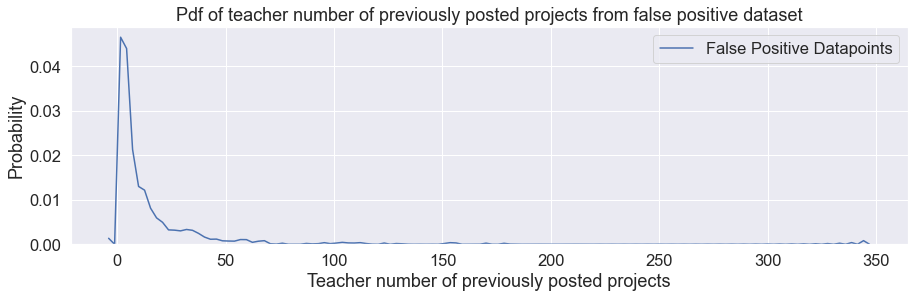

In [213]:
plt.figure(figsize = (15,4))
sns.distplot(pdf_teacher_number_of_previously_posted_projects_df_2.values, hist = False, label = "False Positive Datapoints")
plt.title("Pdf of teacher number of previously posted projects from false positive dataset")
plt.xlabel("Teacher number of previously posted projects")
plt.ylabel("Probability")
plt.legend()
plt.show()



# Task 2

In [216]:
important_features = classifier.feature_importances_

In [218]:
final_important_feature_list = []
for i in range(len(important_features)):
    if important_features[i]!=0:
        final_important_feature_list.append(i)

print("Number of useful features = " + str(len(final_important_feature_list)))

Number of useful features = 4


In [220]:
#Selecting only important features from Set 1 feature list from X_train
train_feature_df = pandas.DataFrame(X_train_merge_1.todense())
train_important_feature_df = train_feature_df.iloc[:,final_important_feature_list]
train_important_feature_df.shape

(69918, 4)

In [221]:
#Selecting only important features from Set 1 feature list from X_test
test_feature_df = pandas.DataFrame(X_test_merge_1.todense())
test_important_feature_df = test_feature_df.iloc[:,final_important_feature_list]
test_important_feature_df.shape

(21850, 4)

# Applying Decision Trees on the New Data Frame with the Best Features

In [224]:
decision_tree = DecisionTreeClassifier(max_depth = 3)
classifier =  decision_tree.fit(train_important_feature_df, y_train)

In [225]:
final_important_feature_names = []
for i in range(len(set_1_feature_names)):
    if i in final_important_feature_list:
        final_important_feature_names.append(set_1_feature_names[i])
        
len(final_important_feature_names)

4

In [226]:
decision_tree = DecisionTreeClassifier()
parameter_range = {"max_depth" : [1,5,10,100,500], "min_samples_split" : [5,10,50,100,500]}

In [227]:
#ref:https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
classifier = GridSearchCV(decision_tree, parameter_range, cv=10, scoring = "roc_auc", n_jobs = 1, verbose = 10, return_train_score = True)

classifier.fit(train_important_feature_df, y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
[CV 1/10; 1/25] START max_depth=1, min_samples_split=5..........................
[CV 1/10; 1/25] END max_depth=1, min_samples_split=5;, score=(train=0.555, test=0.555) total time=   0.0s
[CV 2/10; 1/25] START max_depth=1, min_samples_split=5..........................
[CV 2/10; 1/25] END max_depth=1, min_samples_split=5;, score=(train=0.555, test=0.551) total time=   0.0s
[CV 3/10; 1/25] START max_depth=1, min_samples_split=5..........................
[CV 3/10; 1/25] END max_depth=1, min_samples_split=5;, score=(train=0.554, test=0.563) total time=   0.0s
[CV 4/10; 1/25] START max_depth=1, min_samples_split=5..........................
[CV 4/10; 1/25] END max_depth=1, min_samples_split=5;, score=(train=0.554, test=0.560) total time=   0.0s
[CV 5/10; 1/25] START max_depth=1, min_samples_split=5..........................
[CV 5/10; 1/25] END max_depth=1, min_samples_split=5;, score=(train=0.556, test=0.550) total time=   0.0s
[C

[CV 6/10; 5/25] END max_depth=1, min_samples_split=500;, score=(train=0.555, test=0.553) total time=   0.0s
[CV 7/10; 5/25] START max_depth=1, min_samples_split=500........................
[CV 7/10; 5/25] END max_depth=1, min_samples_split=500;, score=(train=0.554, test=0.559) total time=   0.0s
[CV 8/10; 5/25] START max_depth=1, min_samples_split=500........................
[CV 8/10; 5/25] END max_depth=1, min_samples_split=500;, score=(train=0.555, test=0.555) total time=   0.0s
[CV 9/10; 5/25] START max_depth=1, min_samples_split=500........................
[CV 9/10; 5/25] END max_depth=1, min_samples_split=500;, score=(train=0.556, test=0.550) total time=   0.0s
[CV 10/10; 5/25] START max_depth=1, min_samples_split=500.......................
[CV 10/10; 5/25] END max_depth=1, min_samples_split=500;, score=(train=0.556, test=0.550) total time=   0.0s
[CV 1/10; 6/25] START max_depth=5, min_samples_split=5..........................
[CV 1/10; 6/25] END max_depth=5, min_samples_split=5;,

[CV 10/10; 9/25] END max_depth=5, min_samples_split=100;, score=(train=0.632, test=0.624) total time=   0.1s
[CV 1/10; 10/25] START max_depth=5, min_samples_split=500.......................
[CV 1/10; 10/25] END max_depth=5, min_samples_split=500;, score=(train=0.631, test=0.618) total time=   0.1s
[CV 2/10; 10/25] START max_depth=5, min_samples_split=500.......................
[CV 2/10; 10/25] END max_depth=5, min_samples_split=500;, score=(train=0.632, test=0.610) total time=   0.1s
[CV 3/10; 10/25] START max_depth=5, min_samples_split=500.......................
[CV 3/10; 10/25] END max_depth=5, min_samples_split=500;, score=(train=0.630, test=0.645) total time=   0.0s
[CV 4/10; 10/25] START max_depth=5, min_samples_split=500.......................
[CV 4/10; 10/25] END max_depth=5, min_samples_split=500;, score=(train=0.631, test=0.621) total time=   0.0s
[CV 5/10; 10/25] START max_depth=5, min_samples_split=500.......................
[CV 5/10; 10/25] END max_depth=5, min_samples_spli

[CV 4/10; 14/25] END max_depth=10, min_samples_split=100;, score=(train=0.656, test=0.620) total time=   0.1s
[CV 5/10; 14/25] START max_depth=10, min_samples_split=100......................
[CV 5/10; 14/25] END max_depth=10, min_samples_split=100;, score=(train=0.653, test=0.624) total time=   0.1s
[CV 6/10; 14/25] START max_depth=10, min_samples_split=100......................
[CV 6/10; 14/25] END max_depth=10, min_samples_split=100;, score=(train=0.656, test=0.616) total time=   0.2s
[CV 7/10; 14/25] START max_depth=10, min_samples_split=100......................
[CV 7/10; 14/25] END max_depth=10, min_samples_split=100;, score=(train=0.650, test=0.641) total time=   0.1s
[CV 8/10; 14/25] START max_depth=10, min_samples_split=100......................
[CV 8/10; 14/25] END max_depth=10, min_samples_split=100;, score=(train=0.658, test=0.612) total time=   0.1s
[CV 9/10; 14/25] START max_depth=10, min_samples_split=100......................
[CV 9/10; 14/25] END max_depth=10, min_sample

[CV 7/10; 18/25] END max_depth=100, min_samples_split=50;, score=(train=0.844, test=0.563) total time=   0.6s
[CV 8/10; 18/25] START max_depth=100, min_samples_split=50......................
[CV 8/10; 18/25] END max_depth=100, min_samples_split=50;, score=(train=0.840, test=0.565) total time=   0.3s
[CV 9/10; 18/25] START max_depth=100, min_samples_split=50......................
[CV 9/10; 18/25] END max_depth=100, min_samples_split=50;, score=(train=0.841, test=0.549) total time=   0.4s
[CV 10/10; 18/25] START max_depth=100, min_samples_split=50.....................
[CV 10/10; 18/25] END max_depth=100, min_samples_split=50;, score=(train=0.845, test=0.570) total time=   0.6s
[CV 1/10; 19/25] START max_depth=100, min_samples_split=100.....................
[CV 1/10; 19/25] END max_depth=100, min_samples_split=100;, score=(train=0.790, test=0.598) total time=   0.7s
[CV 2/10; 19/25] START max_depth=100, min_samples_split=100.....................
[CV 2/10; 19/25] END max_depth=100, min_sam

[CV 10/10; 22/25] END max_depth=500, min_samples_split=10;, score=(train=0.953, test=0.523) total time=   0.4s
[CV 1/10; 23/25] START max_depth=500, min_samples_split=50......................
[CV 1/10; 23/25] END max_depth=500, min_samples_split=50;, score=(train=0.844, test=0.576) total time=   0.4s
[CV 2/10; 23/25] START max_depth=500, min_samples_split=50......................
[CV 2/10; 23/25] END max_depth=500, min_samples_split=50;, score=(train=0.846, test=0.552) total time=   0.6s
[CV 3/10; 23/25] START max_depth=500, min_samples_split=50......................
[CV 3/10; 23/25] END max_depth=500, min_samples_split=50;, score=(train=0.843, test=0.574) total time=   0.4s
[CV 4/10; 23/25] START max_depth=500, min_samples_split=50......................
[CV 4/10; 23/25] END max_depth=500, min_samples_split=50;, score=(train=0.847, test=0.564) total time=   0.4s
[CV 5/10; 23/25] START max_depth=500, min_samples_split=50......................
[CV 5/10; 23/25] END max_depth=500, min_samp

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'max_depth': [1, 5, 10, 100, 500],
                         'min_samples_split': [5, 10, 50, 100, 500]},
             return_train_score=True, scoring='roc_auc', verbose=10)

In [228]:
auc_train = classifier.cv_results_["mean_train_score"]
auc_cv = classifier.cv_results_["mean_test_score"]


In [229]:
max_depth = [1,1,1,1,1,5,5,5,5,5,10,10,10,10,10,100,100,100,100,100,500,500,500,500,500]
min_samples_split = [5,10,50,100,500,5,10,50,100,500,5,10,50,100,500,5,10,50,100,500,5,10,50,100,500]

In [230]:
auc_train_df = pandas.DataFrame(data = {"Max Depth":max_depth, "Min Sample Split":min_samples_split, "Train AUC Score":auc_train})

In [231]:
auc_train_df = auc_train_df.pivot(index = "Max Depth", columns = "Min Sample Split", values = "Train AUC Score")


Text(0.5, 1.0, 'AUC Heatmap for Training Dataset')

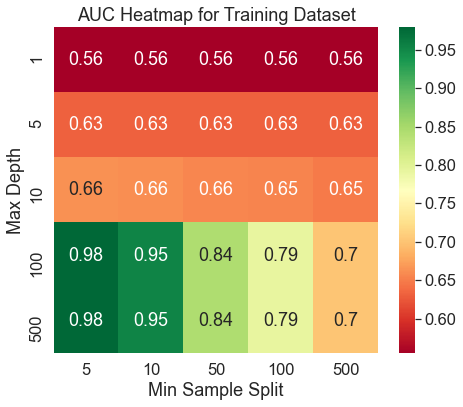

In [232]:
sns.set_style("whitegrid")
plt.figure(figsize = (16,6))
plt.subplot(1,2,1)
sns.heatmap(auc_train_df, annot = True, cmap = "RdYlGn").set_title("AUC Heatmap for Training Dataset")

In [233]:
auc_cv_df = pandas.DataFrame(data = {"Max Depth":max_depth, "Min Sample Split":min_samples_split, "CV AUC Score":auc_cv})

In [234]:
auc_cv_df = auc_cv_df.pivot(index = "Max Depth", columns = "Min Sample Split", values = "CV AUC Score")


Text(0.5, 1.0, 'AUC Heatmap for CV Dataset')

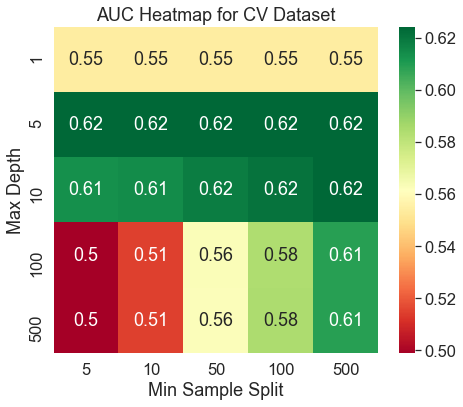

In [235]:
sns.set_style("whitegrid")
plt.figure(figsize = (16,6))
plt.subplot(1,2,1)
sns.heatmap(auc_cv_df, annot = True, cmap = "RdYlGn").set_title("AUC Heatmap for CV Dataset")

#  From the graphs we can see that the best value of max_depth is 5 and min_samples_split is 5

In [236]:
#Training final model based on best value of parameters
final_decision_tree= DecisionTreeClassifier(max_depth = 5, min_samples_split = 5 )
final_decision_tree.fit(train_important_feature_df, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=5)

In [240]:
y_train_pred = final_decision_tree.predict_proba(train_important_feature_df)[:,1]
y_test_pred = final_decision_tree.predict_proba(test_important_feature_df)[:,1]

In [242]:
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_pred)

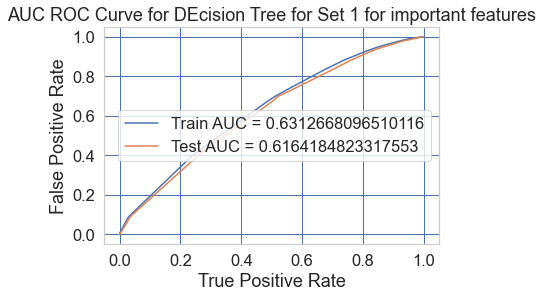

In [243]:
plt.plot(train_fpr, train_tpr, label = "Train AUC = " + str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = "Test AUC = " + str(auc(test_fpr, test_tpr)))
plt.legend()
plt.grid(b = True, which = "major", color = "b", linestyle ="-")
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC ROC Curve for DEcision Tree for Set 1 for important features")
plt.show()

# Plotting Confusion Matrix

In [244]:
from sklearn.metrics import confusion_matrix

Test Confusion Matrix
Max value of tpr*(1-fpr) is  0.33480824669820486 for threshold  0.861
[[ 1634  1674]
 [ 5974 12568]]
Max value of tpr*(1-fpr) is  0.33480824669820486 for threshold  0.861


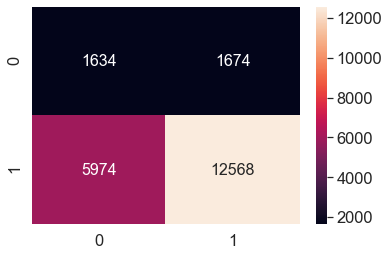

In [245]:
print("Test Confusion Matrix")
print(confusion_matrix(y_test, predict(y_test_pred, test_thresholds, test_fpr, test_tpr)))
cm_df = pandas.DataFrame(confusion_matrix(y_test, predict(y_test_pred, test_thresholds, test_fpr, test_tpr )),range(2), range(2))
sns.set(font_scale = 1.5)
sns.heatmap(cm_df, annot = True, annot_kws = {"size":16}, fmt = "g")
